In [59]:
import pandas as pd

validation_df = pd.read_csv('validation_set_interpolated.csv')
print(validation_df.head())

    k_2_by   k_4_by   k_6_by   k_8_by  k_22_by  k_23_by  k_24_by  k_25_by  \
0  1447.50  1624.50  1677.50  1454.50  1328.00  1448.50  1368.00  1443.00   
1  1544.25  1721.25  1774.25  1551.25  1424.75  1545.25  1464.75  1539.75   
2  1264.00  1441.00  1494.00  1271.00  1144.50  1265.00  1184.50  1259.50   
3   358.00   535.00   588.00   365.00   238.50   359.00   278.50   353.50   
4  1254.50  1431.50  1484.50  1261.50  1135.00  1255.50  1175.00  1250.00   

   k_26_by  k_28_by  ...    e_326    e_329    e_330    e_332    e_334  \
0  1443.00  1441.00  ...  1740.00  1762.00  1777.50  1741.50  1756.50   
1  1539.75  1537.75  ...  1836.75  1858.75  1874.25  1838.25  1853.25   
2  1259.50  1257.50  ...  1556.50  1578.50  1594.00  1558.00  1573.00   
3   353.50   351.50  ...   650.50   672.50   688.00   652.00   667.00   
4  1250.00  1248.00  ...  1547.00  1569.00  1584.50  1548.50  1563.50   

     e_343  death_year  inferred_birth_year  person_id  birth_year  
0  1763.50      1784.0       

In [60]:
import xgboost as xgb

# Load the model from index_year_model.json
model = xgb.Booster()
model.load_model('index_year_model.json')

# Predict the index year by all fields except the birth year(y)
birth_year_df = validation_df['birth_year']
personid_df = validation_df['person_id']
validation_df = validation_df.drop(columns=['birth_year', 'person_id'])
dvalidation = xgb.DMatrix(validation_df)
validation_df['index_year'] = model.predict(dvalidation)
print(validation_df.shape)
validation_df.head(40)

(1652, 638)


,k_2_by,k_4_by,k_6_by,k_8_by,k_22_by,k_23_by,k_24_by,k_25_by,k_26_by,k_28_by,...,e_323,e_326,e_329,e_330,e_332,e_334,e_343,death_year,inferred_birth_year,index_year
0,1447.500000,1624.500000,1677.500000,1454.500000,1328.000000,1448.500000,1368.000000,1443.000000,1443.000000,1441.000000,...,1748.000000,1740.000000,1762.000000,1777.500000,1741.500000,1756.500000,1763.500000,1784.0,1726.500000,1724.060669
1,1544.250000,1721.250000,1774.250000,1551.250000,1424.750000,1545.250000,1464.750000,1539.750000,1539.750000,1537.750000,...,1844.750000,1836.750000,1858.750000,1874.250000,1838.250000,1853.250000,1860.250000,1890.0,1823.250000,1824.423096
2,1264.000000,1441.000000,1494.000000,1271.000000,1144.500000,1265.000000,1184.500000,1259.500000,1259.500000,1257.500000,...,1564.500000,1556.500000,1578.500000,1594.000000,1558.000000,1573.000000,1580.000000,1604.0,1543.000000,1543.807617
3,358.000000,535.000000,588.000000,365.000000,238.500000,359.000000,278.500000,353.500000,353.500000,351.500000,...,658.500000,650.500000,672.500000,688.000000,652.000000,667.000000,674.000000,698.0,637.000000,638.809692
4,1254.500000,1431.500000,1484.500000,1261.500000,1135.000000,1255.500000,1175.000000,1250.000000,1250.000000,1248.000000,...,1555.000000,1547.000000,1569.000000,1584.500000,1548.500000,1563.500000,1570.500000,1591.0,1533.500000,1535.221680
5,1066.333333,1243.333333,1296.333333,1073.333333,946.833333,1067.333333,986.833333,1061.833333,1061.833333,1059.833333,...,1366.833333,1358.833333,1380.833333,1396.333333,1360.333333,1375.333333,1382.333333,1400.0,1345.333333,1351.191528
6,459.333333,636.333333,689.333333,466.333333,339.833333,460.333333,379.833333,454.833333,454.833333,452.833333,...,759.833333,751.833333,773.833333,789.333333,753.333333,768.333333,775.333333,804.0,738.333333,740.590576
7,423.666667,600.666667,653.666667,430.666667,304.166667,424.666667,344.166667,419.166667,419.166667,417.166667,...,724.166667,716.166667,738.166667,753.666667,717.666667,732.666667,739.666667,738.0,702.666667,710.037964
8,947.000000,1124.000000,1177.000000,954.000000,827.500000,948.000000,867.500000,942.500000,942.500000,940.500000,...,1247.500000,1239.500000,1261.500000,1277.000000,1241.000000,1256.000000,1263.000000,1304.0,1226.000000,1225.796387
9,1234.000000,1411.000000,1464.000000,1241.000000,1114.500000,1235.000000,1154.500000,1229.500000,1229.500000,1227.500000,...,1534.500000,1526.500000,1548.500000,1564.000000,1528.000000,1543.000000,1550.000000,1574.0,1513.000000,1509.933350


In [61]:
# Using non-NaN value counts and the full set counts in the validation set to calculate the recall
non_nan_count = validation_df['inferred_birth_year'].notna().sum()
print(non_nan_count)
full_count = validation_df['inferred_birth_year'].size
recall = non_nan_count / full_count

# Drop the NaN values in the index year
# validation_df = validation_df.dropna()
print(validation_df.shape)

1609
(1652, 638)


In [62]:
# # save the result to a csv file
# validation_df['birth_year'] = birth_year_df
# validation_df.to_csv('validation_set_predicted.csv', index=False)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import recall_score, precision_score, f1_score

print('MAE:', mean_absolute_error(birth_year_df, validation_df['index_year']))
print('RMSE:', mean_squared_error(birth_year_df, validation_df['index_year'], squared=False))
print('R2:', r2_score(birth_year_df, validation_df['index_year']))
# print('Recall:', recall)
print("STD:", birth_year_df.std())

MAE: 10.033610447844351
RMSE: 22.9241680850365
R2: 0.9962479865532473
STD: 374.3629629607035


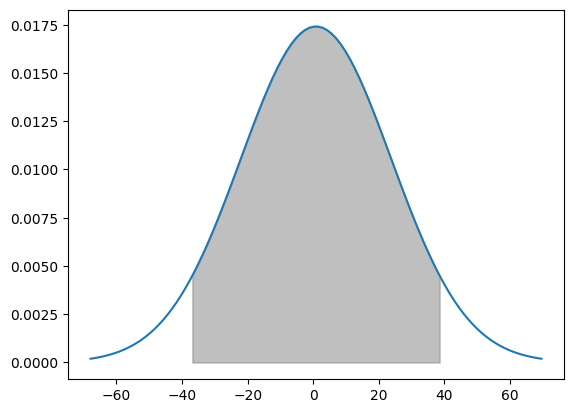

In [64]:
# Draw a normal curve for the diff
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

diff = birth_year_df - validation_df['index_year']
mean = diff.mean()
std = diff.std()

# color the 90% confidence interval
plt.fill_between(np.linspace(mean - 1.645 * std, mean + 1.645 * std, 100),
                 stats.norm.pdf(np.linspace(mean - 1.645 * std, mean + 1.645 * std, 100), mean, std),
                 color='gray', alpha=0.5)
plt.plot(np.linspace(mean - 3 * std, mean + 3 * std, 100),
            stats.norm.pdf(np.linspace(mean - 3 * std, mean + 3 * std, 100), mean, std))
plt.show()


In [65]:
# What is the percent of data that is within 10 years of the true birth year?

diff = abs(birth_year_df - validation_df['index_year'])
within_10 = diff[diff <= 10].size
percent_within_10 = within_10 / full_count
print('Percent within 10 years:', percent_within_10)

Percent within 10 years: 0.7209443099273608


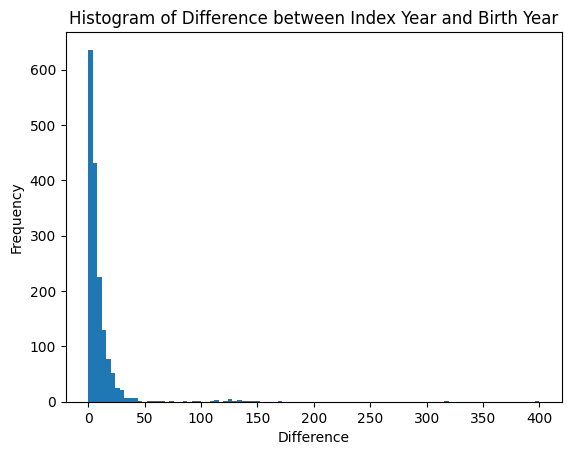

In [66]:
# Draw a histogram of the diff
plt.hist(diff, bins=100)
plt.title('Histogram of Difference between Index Year and Birth Year')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()


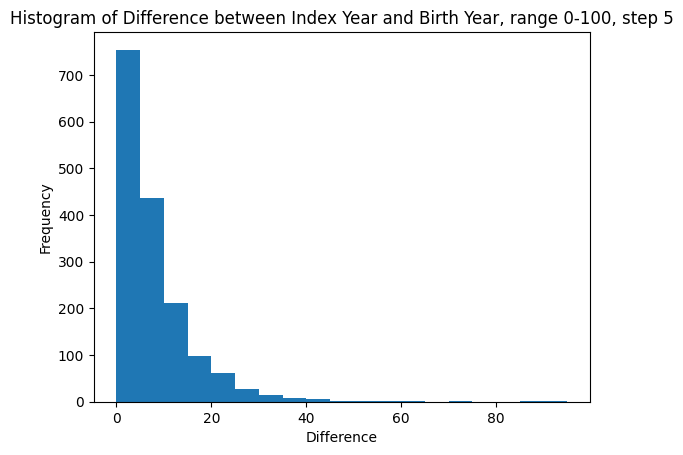

In [67]:
plt.hist(diff, bins=range(0, 100, 5))
plt.title('Histogram of Difference between Index Year and Birth Year, range 0-100, step 5')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.show()

In [68]:
validation_df['birth_year'] = birth_year_df
validation_df['person_id'] = personid_df
validation_df['diff'] = diff
validation_df['std'] = std
validation_df.to_excel('validation_set_predicted.xlsx', index=False)
